# Emotional and Personal Health

Dharma Teja Bhattu and Collin Stratton

CST-440

Dr. Isac Artzi

4/10/2022

# Introduction
The purpose of this assignment is to explore the relationships among various network-based factors and the emotional and personal health of individuals. Specifically, the analysis of the personal health and social status of individuals in different weight groups. The psychosocial burden of those with obesity and their social groups with be explored and hypothesized, as well as a statistical analysis of the hypothesizes generated will be performed.

## Psychosocial Burden of Obesity
The lack of proper nutrition’s caused by unhealthy food choices can lead to obesity along with the side effects associated with it. Obesity is not as simple as being over-weight, it also has significant psychosocial burdens. Obesity can lead to psychiatric illness such as: depression, eating disorders, anxiety, substance abuse, self-esteem issues, poor quality of life and body image, sexual abuse, physical abuse, emotional neglect, stigma, and discrimination. People who become accustomed to obesity tend to have poor quality of life weather it’s in terms of eating disorder or important life decisions they make. Over time it will become more difficult for them to break away from these habits that will make the psychological situation worse. They will start to isolate themselves from society due to their poor self-esteem, and false sense of body image which can eventually lead to depression and anxiety.

It is easy to become accustomed to bad eating habits but the psychosocial problems that arise from it can have long-term impacting a person’s motivation. Being obese can make some people lazy and lack motivation to change their habits to have a better quality of life. However, some people will make an effort to motivation themselves to lose weight. Although they will strive to get better, they might have a false sense of expectations. Their intentions might be to look better rather than focusing on the health aspect of losing weight. They might think losing weight might make them more acceptable in society or improve their marital and sexual relationships. Being obese is not about being fat, but more about the negative psychosocial abuse that comes with it. It is important to acknowledge the issue and work towards making better life and health choices.


## Hypothesis Tests
Our hypotheses about the data are as follows:
- Based on prior research and biases in our perception, we hypothesize that in a group of about 200 people with diverse weight groups, those in normal weight groups will be the most connected with those in their own weight group as well as with those outside their weight group.
- Furthermore, those outside the normal weight range will be less connected and in smaller social groups.

Our methodology for testing these hypotheses are as follows. First, we will perform a visual analysis of the bipartite graph generated from obesity connection data. Next, we will analyze the degree and centrality of the graph to understand the connectivity of the graph. Finally, analysis of the data against the hyptoheses will be performed.

# Code

In [1]:
# imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Data Explanation
The data was gathered from dataset in Kaggle that presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. This data originally had no connections between people in the dataset, so connections had to be randomly generated between users with probabilities assigned to add variation within the connection list. Below the data is gathered from the csv files and a label dictionary is generated to label analyses.

In [2]:
# read in data
obesityDF = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv', header=0, usecols=['NObeyesdad'])
connectionsDF = pd.read_csv('ObesityDataSet.csv', header=None)

# convert connectionsDF to numpy array
connectionsArray = connectionsDF.to_numpy()

# get labels from obesity dataset
labelDict = {}

for i in range(0, len(connectionsArray)):
    for j in range(0, len(connectionsArray[i])):
        labelDict[connectionsArray[i][j]] = obesityDF['NObeyesdad'][connectionsArray[i][0]]

## Data Visualization
Using NetworkX, two graphs were generated to be able to visualize the connection data. The first graph is unlabeled to be able to have a clear visual of the connections in the graph. The second graph includes labels to understand the clumps of data and have a clear label on who is connected.

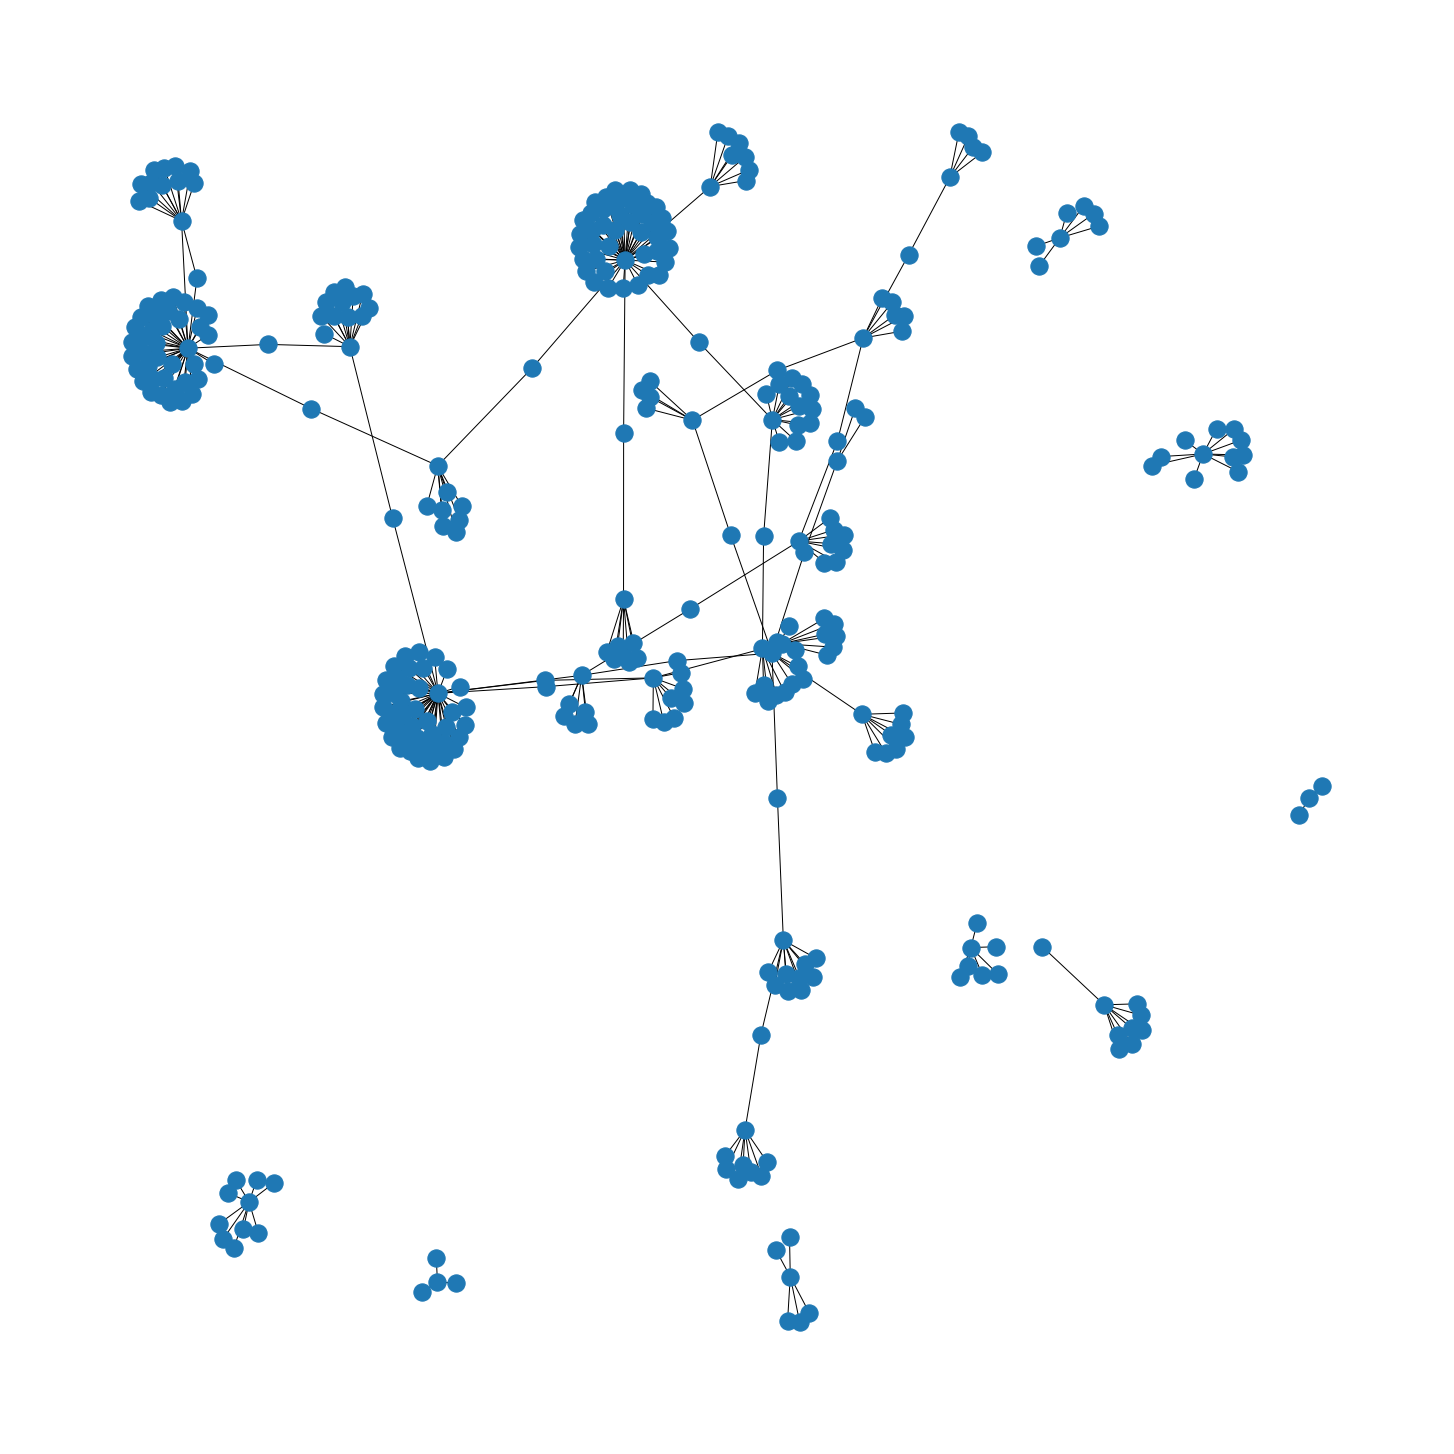

In [3]:
# create graph from connections
G = nx.Graph()
G.add_edges_from(connectionsArray)

# create a plot
plt.figure(figsize=(20,20))

# draw graph
nx.draw(G)

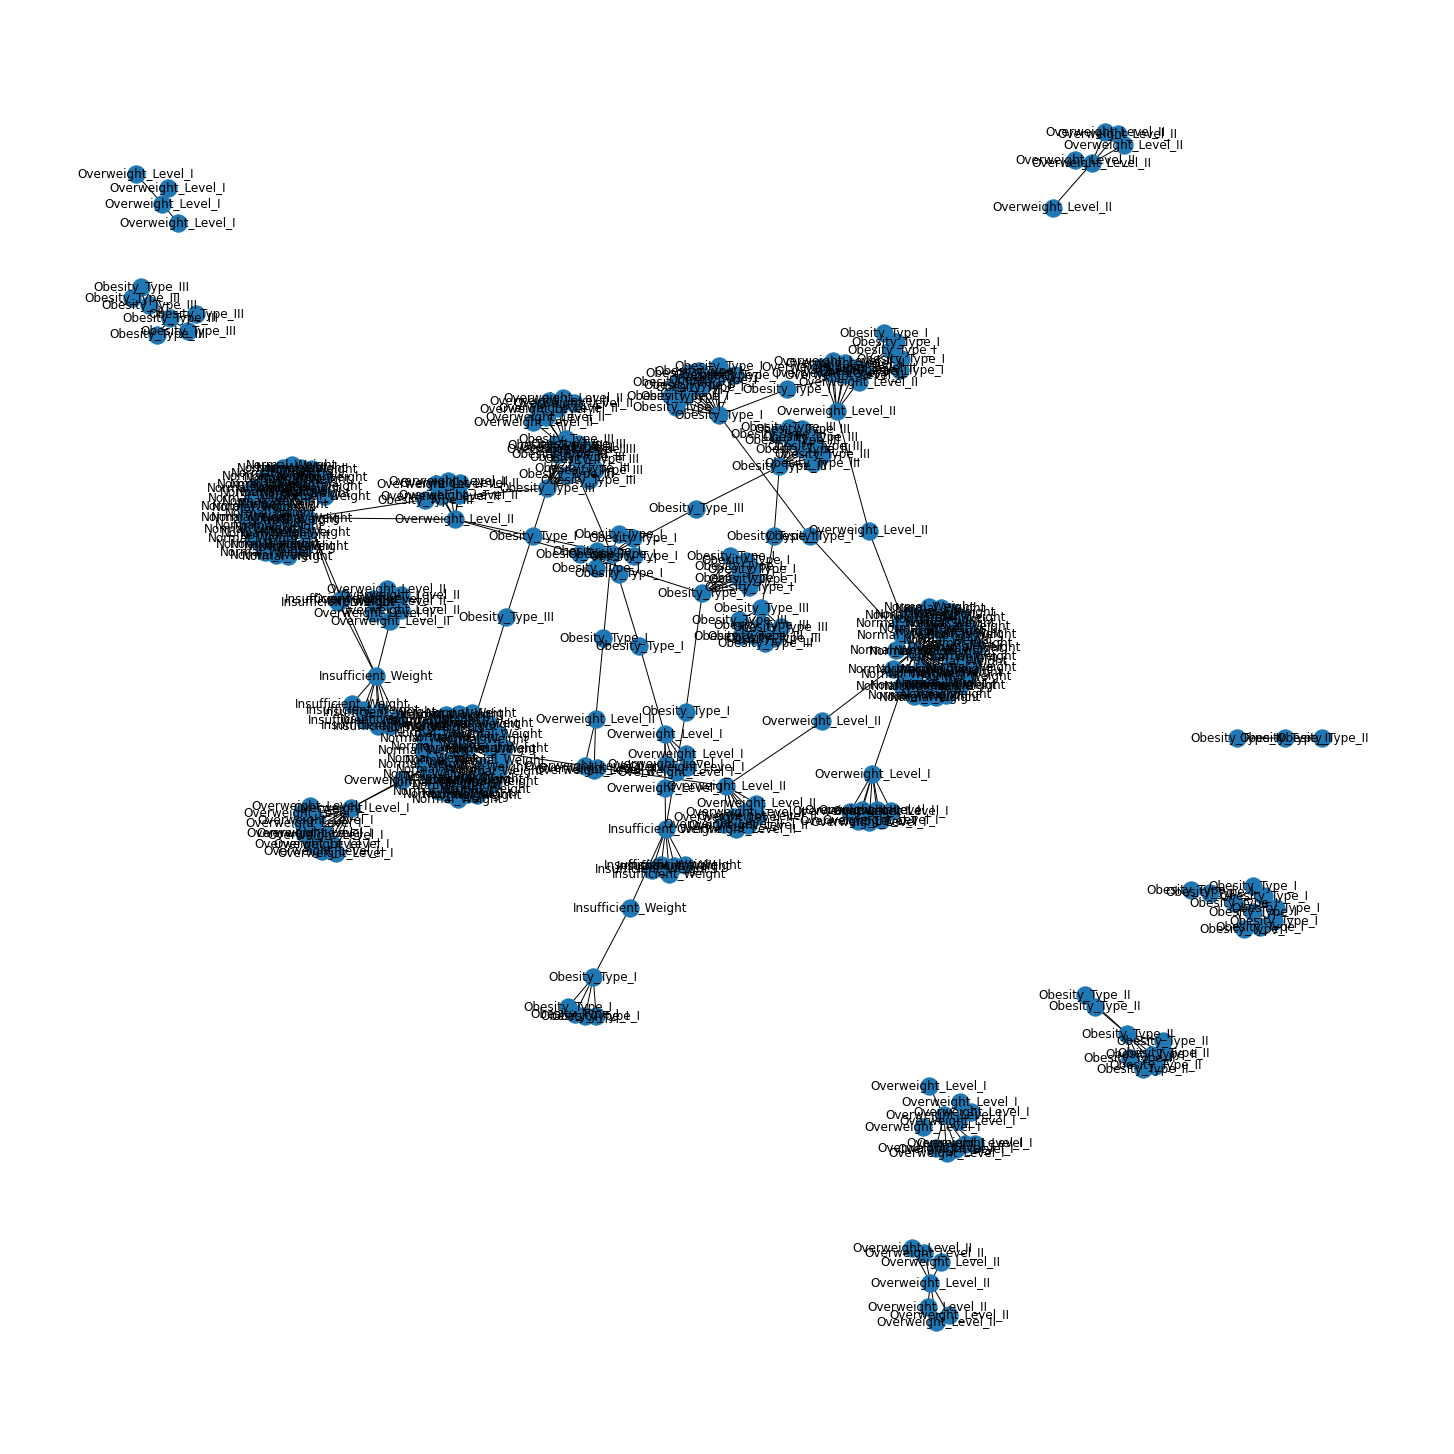

In [4]:
# draw graph with labels
# create a plot
plt.figure(figsize=(20,20))

# draw graph
nx.draw(G, labels=labelDict, with_labels=True)

## Analysis of the Graph
From the graphs it is apparent that there is a strong amount of connections between those in the normal weight category and with those in other weight groups. Additionally, those in weight groups outside the normal range tend to be more connected with those within their weight range. Looking at the graphs, an initial trend we are seeing is the influence of those in their own connection circles. Additional analysis will be performed later, this is just an initial observation to take note of.

## In-Depth Analysis
This next section will explore the centrality and density of the graph data. The information gathered from these analyses will help with determining the accuracy of the hypotheses stated above.

In [5]:
import json

# find the density and centrality of the graph
den = nx.density(G)
cen = nx.degree_centrality(G)
temp = {}

# replace all the keys with label dict values and only keep the max values
for key in cen:
    if labelDict[key] in temp:
        if cen[key] > temp[labelDict[key]]:
            temp[labelDict[key]] = cen[key]
    else:
        temp[labelDict[key]] = cen[key]

print("Degree centrality: ", json.dumps(temp, indent=4))

print("Strongest Degree is", max(temp, key=temp.get), "with centrality:\t", max(temp.values()))

print("Density: ", json.dumps(den, indent=4))

Degree centrality:  {
    "Normal_Weight": 0.13256484149855907,
    "Insufficient_Weight": 0.02881844380403458,
    "Overweight_Level_II": 0.02593659942363112,
    "Obesity_Type_III": 0.040345821325648415,
    "Overweight_Level_I": 0.037463976945244955,
    "Obesity_Type_I": 0.040345821325648415,
    "Obesity_Type_II": 0.023054755043227664
}
Strongest Degree is Normal_Weight with centrality:	 0.13256484149855907
Density:  0.005664314816655073


# Conclusion
After reviewing the data and information generated, the following is our conclusions in analyzing the obesity connection dataset. First, we found that those in the normal weight group were the most connected out of all the other weight groups. Just from looking at the graph it was clear that they formed larger groups with each other, and additionally, the degree centrality analysis found they had the strongest degree with a centrality score of .133. Thus, it is proven that those in normal weight groups are the most connected with those in their own weight group as well as with those outside their weight group. Furthermore, it's clear from the bipartite graphs that those in other weight groups besides the normal weight range have strong connections with each other. However, this connection rarely extends outside their range, thus their lower centrality score. Therefore, its proven that those outside the normal weight range are less connected and are in smaller social groups

# References
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6052856/

https://www.kaggle.com/code/mpwolke/obesity-levels-life-style/notebook
